In [59]:

import pandas as pd

data = pd.read_csv('top5_leagues_player.csv')


print(data.head())

print(data.info())

print(data.describe())
#Val Lipsa
print(data.isnull().sum())


   Unnamed: 0           name                     full_name  age  height  \
0           0        Ederson                           NaN   29    1.88   
1           1  Stefan Ortega          Stefan Ortega Moreno   30    1.85   
2           2   Scott Carson             Scott Paul Carson   37    1.88   
3           3     Rúben Dias  Rúben Santos Gato Alves Dias   26    1.87   
4           4     Nathan Aké           Nathan Benjamin Aké   28    1.80   

                  nationality place_of_birth  price  max_price  \
0            Brazil  Portugal    Osasco (SP)  45.00       70.0   
1              Germany  Spain     Hofgeismar   6.00        6.0   
2                     England     Whitehaven   0.25        6.0   
3                    Portugal        Amadora  75.00       75.0   
4  Netherlands  Cote d'Ivoire       Den Haag  35.00       40.0   

                 position  shirt_nr   foot      club contract_expires  \
0              Goalkeeper        31   left  Man City       2026-06-30   
1     

In [60]:
# Eliminarea coloanei "Unnamed: 0"
data.drop(columns=['Unnamed: 0'], inplace=True)

# Umplerea valorilor lipsă pentru coloanele numerice cu media sau mediana
data['height'].fillna(data['height'].median(), inplace=True)
data['price'].fillna(data['price'].median(), inplace=True)
data['max_price'].fillna(data['max_price'].median(), inplace=True)

# Umplerea valorilor lipsă pentru coloanele de categorie cu 'Unknown' sau valoarea cea mai frecventă
data['place_of_birth'].fillna('Unknown', inplace=True)
data['foot'].fillna(data['foot'].mode()[0], inplace=True)
data['contract_expires'].fillna('Unknown', inplace=True)
data['player_agent'].fillna('Unknown', inplace=True)
data['outfitter'].fillna('Unknown', inplace=True)
# Verificare dacă mai există valori lipsă
print(data.isnull().sum())


name                   0
full_name           1132
age                    0
height                 0
nationality            0
place_of_birth         0
price                  0
max_price              0
position               0
shirt_nr               0
foot                   0
club                   0
contract_expires       0
joined_club            0
player_agent           0
outfitter              0
league                 0
dtype: int64


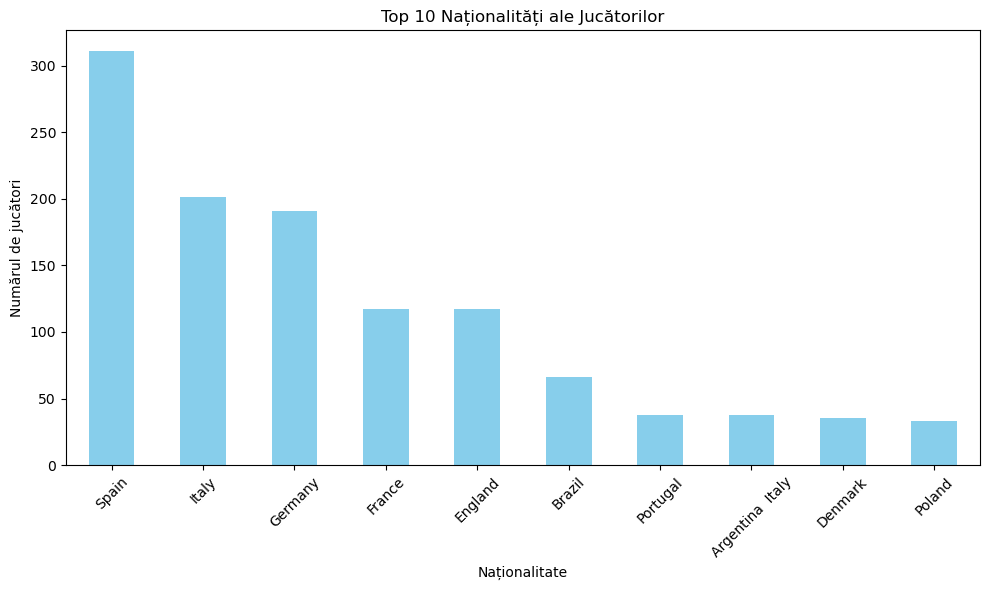

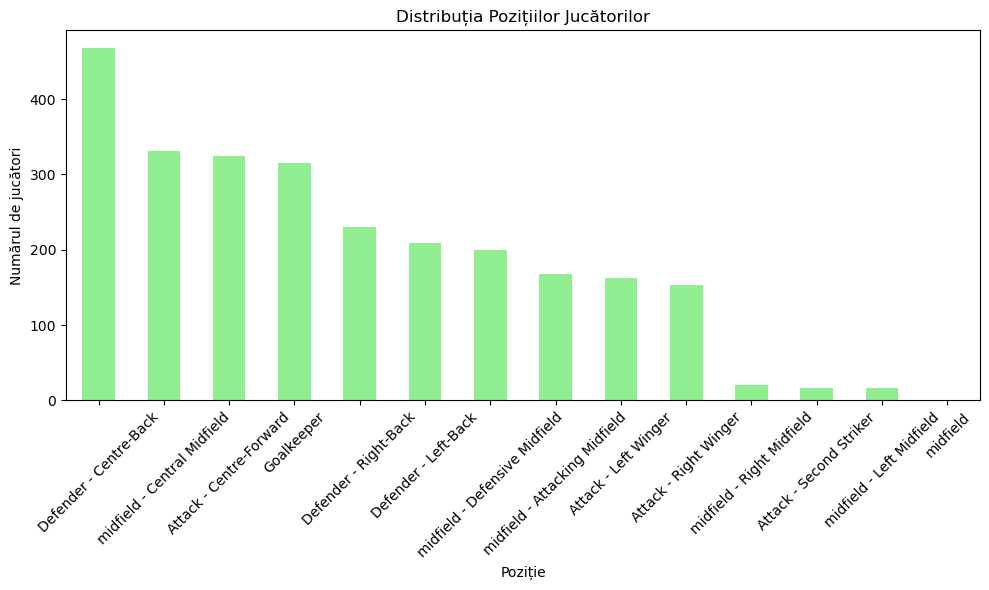

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Citirea datelor din fișierul CSV
data = pd.read_csv('top5_leagues_player.csv')

# Distribuția naționalităților
nationality_counts = data['nationality'].value_counts()

# Reprezentarea grafică pentru distribuția naționalităților
plt.figure(figsize=(10, 6))
nationality_counts.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Naționalitate')
plt.ylabel('Numărul de jucători')
plt.title('Top 10 Naționalități ale Jucătorilor')
plt.xticks(rotation=45)  # Rotirea etichetelor axei x pentru o citire mai ușoară
plt.tight_layout()
plt.show()

# Distribuția pozițiilor jucătorilor
position_counts = data['position'].value_counts()

# Reprezentarea grafică pentru distribuția pozițiilor jucătorilor
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Poziție')
plt.ylabel('Numărul de jucători')
plt.title('Distribuția Pozițiilor Jucătorilor')
plt.xticks(rotation=45)  # Rotirea etichetelor axei x pentru o citire mai ușoară
plt.tight_layout()
plt.show()


Gini index pentru Unnamed: 0: 0.33346094946401217
Gini index pentru age: 0.1000891511318962
Gini index pentru height: 0.02086123152892916
Gini index pentru price: 0.6251160644436822
Gini index pentru max_price: 0.5781217529136358
Gini index pentru shirt_nr: 0.4284633315841091
Entropia pentru name: 11.347110697626432
Entropia pentru full_name: 10.531381460516466
Entropia pentru nationality: 6.652926962917683
Entropia pentru place_of_birth: 9.954787113677588
Entropia pentru position: 3.338242724318638
Entropia pentru foot: 1.0426218188335237
Entropia pentru club: 6.666950993478749
Entropia pentru contract_expires: 2.42184736963967
Entropia pentru joined_club: 7.265083476061799
Entropia pentru player_agent: 8.142817111865563
Entropia pentru outfitter: 1.772803728292786
Entropia pentru league: 2.575811092203217


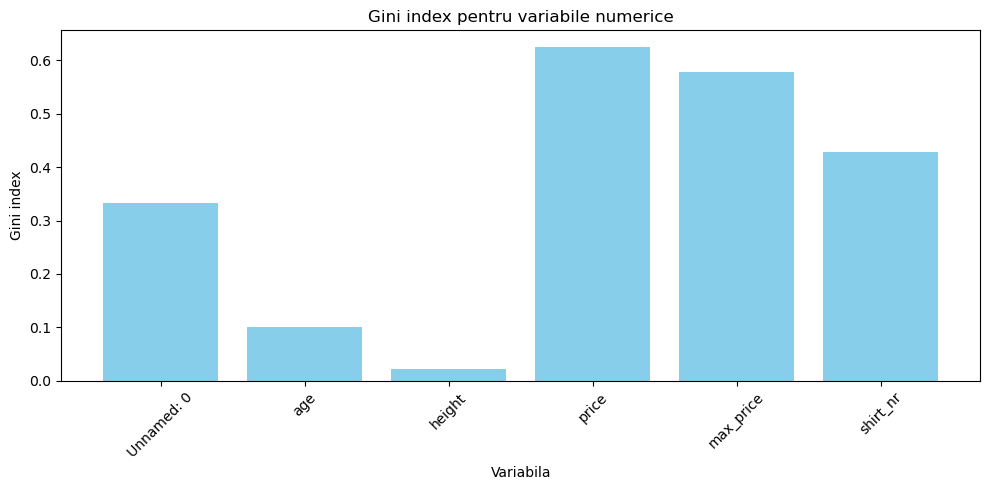

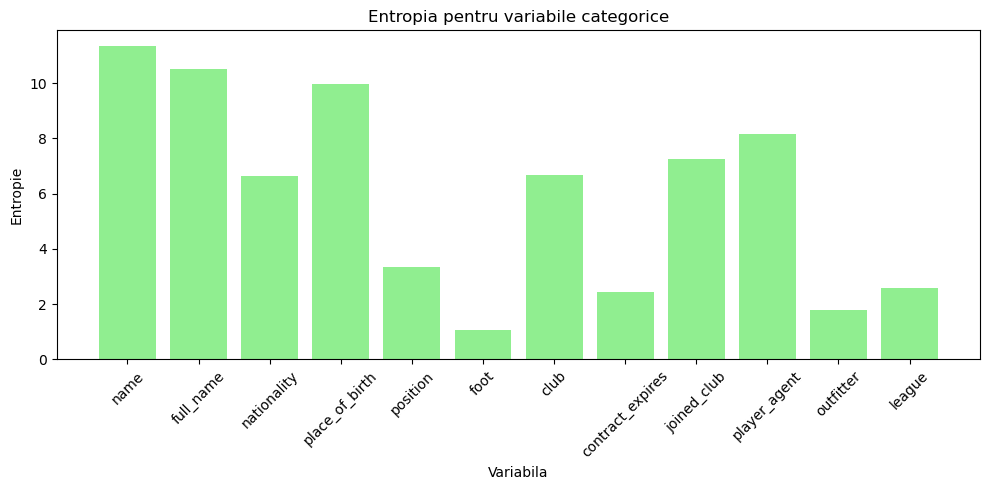

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Citirea datelor din fișierul CSV
data = pd.read_csv('top5_leagues_player.csv')

# Funcția corectată pentru calculul Gini index
def gini_index(data):
    # Eliminăm valorile lipsă și ne asigurăm că datele sunt numerice
    data = data.dropna()
    if len(data) == 0:
        return np.nan
    sorted_data = np.sort(data)
    n = len(data)
    index = np.arange(1, n+1)
    gini_coef = (2 * np.sum(index * sorted_data)) / (n * np.sum(sorted_data)) - (n + 1) / n
    return gini_coef

# Calculul Gini index pentru toate coloanele numerice
gini_indices = {}
for column in data.select_dtypes(include=[np.number]).columns:
    gini_indices[column] = gini_index(data[column])
    print(f"Gini index pentru {column}: {gini_indices[column]}")

# Calcularea entropiei pentru variabile categorice
def entropy(data):
    probabilities = data.value_counts(normalize=True)
    entropy_value = -sum(probabilities * np.log2(probabilities))
    return entropy_value

# Calculul entropiei pentru fiecare coloană categorică
entropy_values = {}
for column in data.select_dtypes(include=[object]).columns:
    entropy_values[column] = entropy(data[column])
    print(f"Entropia pentru {column}: {entropy_values[column]}")

# Reprezentarea grafică pentru Gini index
plt.figure(figsize=(10, 5))
plt.bar(gini_indices.keys(), gini_indices.values(), color='skyblue')
plt.xlabel('Variabila')
plt.ylabel('Gini index')
plt.title('Gini index pentru variabile numerice')
plt.xticks(rotation=45)  # Rotirea etichetelor axei x
plt.tight_layout()
plt.show()

# Reprezentarea grafică pentru entropie
plt.figure(figsize=(10, 5))
plt.bar(entropy_values.keys(), entropy_values.values(), color='lightgreen')
plt.xlabel('Variabila')
plt.ylabel('Entropie')
plt.title('Entropia pentru variabile categorice')
plt.xticks(rotation=45)  # Rotirea etichetelor axei x
plt.tight_layout()
plt.show()


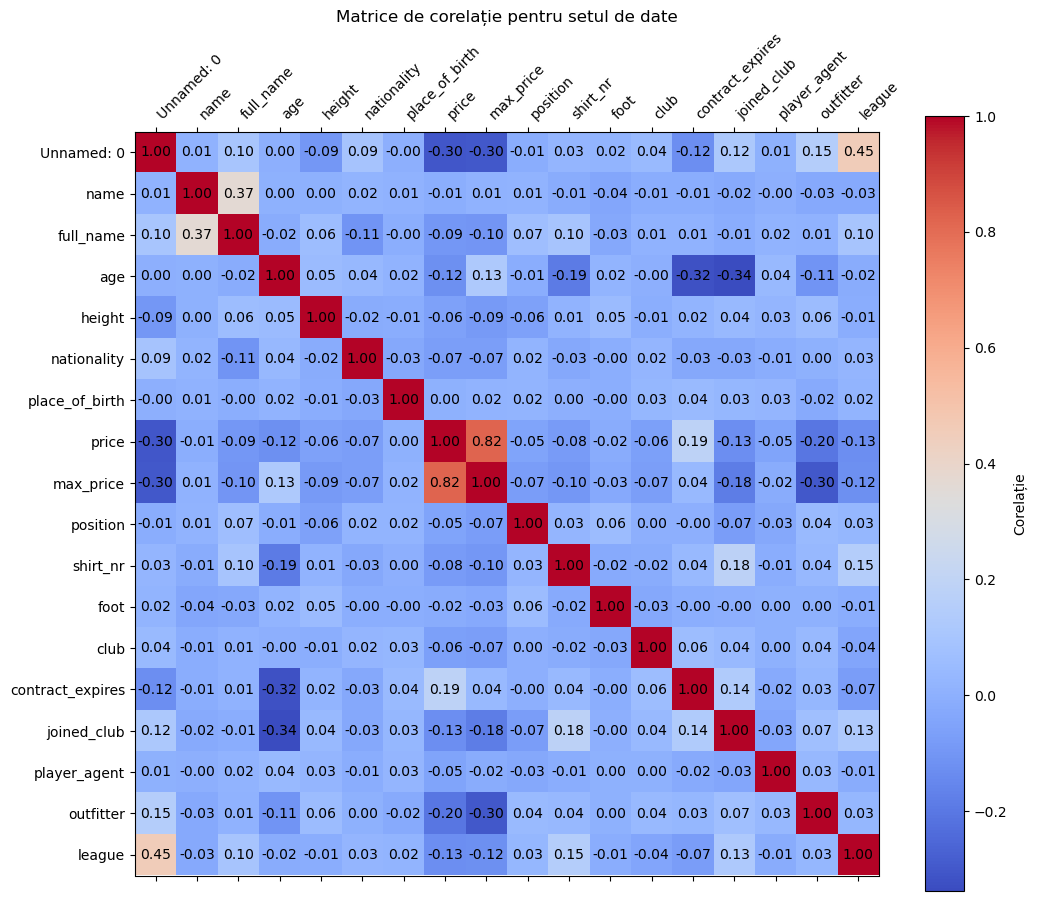

In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Citirea datelor din fișierul CSV
data = pd.read_csv('top5_leagues_player.csv')

# Encoding categorical variables to numerical values
label_encoders = {}
for column in data.select_dtypes(include=[object]).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Calcularea matricei de corelație pentru toate coloanele
correlation_matrix = data.corr()

# Afișarea matricei de corelație cu valori exacte
plt.figure(figsize=(12, 10))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar(label='Corelație')
plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45, ha='left')
plt.yticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns)
plt.title('Matrice de corelație pentru setul de date')

# Adding correlation values on the heatmap
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(x=j, y=i, s="{:.2f}".format(correlation_matrix.iloc[i, j]), ha='center', va='center', fontsize=10, color='black')

plt.show()


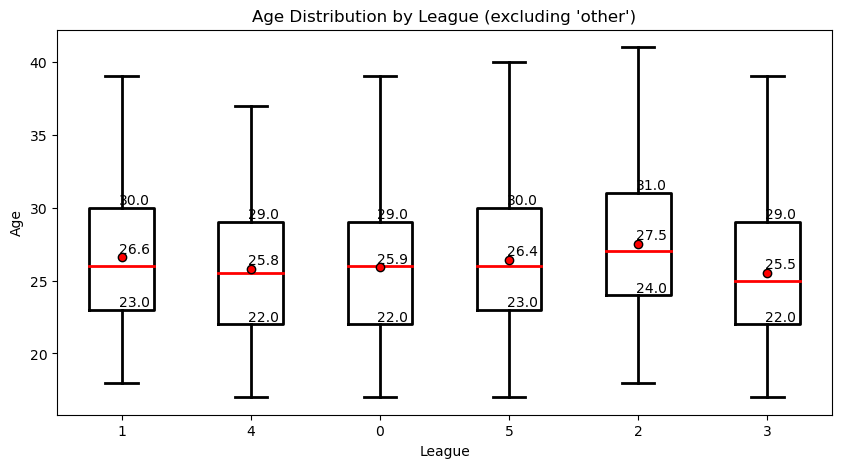

In [64]:
import matplotlib.pyplot as plt

# Get age data by league, excluding "Other"
league_data = []
league_labels = []
for league in data['league'].unique():
    if league != "Other":
        league_data.append(data[data['league'] == league]['age'])
        league_labels.append(league)

# Create a box prot
plt.figure(figsize=(10,5 ))
boxprops = dict(linewidth=2)
whiskerprops = dict(linewidth=2)
capprops = dict(linewidth=2)
medianprops = dict(linewidth=2, color='red')
meanprops = dict(marker='o', markeredgecolor='black', markerfacecolor='red')

# Draw box plot
boxplot = plt.boxplot(league_data, labels=league_labels, showmeans=True, showfliers=False,
                      boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops,
                      medianprops=medianprops, meanprops=meanprops)

# Display mean,first quartile, thrid quartile
for i, league in enumerate(league_labels):
    data = league_data[i]
    mean = data.mean()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    plt.text(i + 1.1, mean + 0.1, f"{mean:.1f}", ha='center', va='bottom')
    plt.text(i + 1.1, q1, f"{q1:.1f}", ha='center', va='bottom')
    plt.text(i + 1.1, q3+1, f"{q3:.1f}", ha='center', va='top')

# Name titele,x-axis,and y-axis of the box plot
plt.title("Age Distribution by League (excluding 'other')")
plt.xlabel("League")
plt.ylabel("Age")

# Display the box plot
plt.show()

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Citirea datelor
data = pd.read_csv('top5_leagues_player.csv')

# Verificarea numelor coloanelor
print(data.columns)

# Eliminarea înregistrărilor care conțin valori lipsă
data.dropna(inplace=True)

# Selectarea caracteristicilor și variabilei target
X = data[['age', 'height', 'max_price']]  # Actualizăm lista de caracteristici
y = data['price']

# Împărțirea datelor în setul de antrenare și setul de testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inițializarea modelului Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Antrenarea modelului
model.fit(X_train, y_train)

# Prezicerea valorilor pentru setul de testare
predictions = model.predict(X_test)

# Calcularea erorii medie pătratice
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Index(['Unnamed: 0', 'name', 'full_name', 'age', 'height', 'nationality',
       'place_of_birth', 'price', 'max_price', 'position', 'shirt_nr', 'foot',
       'club', 'contract_expires', 'joined_club', 'player_agent', 'outfitter',
       'league'],
      dtype='object')
Mean Squared Error: 195.76953614859434


In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

# Inițializarea modelului de regresie liniară
linear_model = LinearRegression()

# Antrenarea modelului
linear_model.fit(X_train, y_train)

# Prezicerea valorilor pentru setul de testare folosind modelul de regresie liniară
predictions_linear = linear_model.predict(X_test)

# Calcularea metricei pentru regresia liniară
mse_linear = mean_squared_error(y_test, predictions_linear)
mae_linear = mean_absolute_error(y_test, predictions_linear)
medae_linear = median_absolute_error(y_test, predictions_linear)
r2_linear = r2_score(y_test, predictions_linear)


Mean Squared Error (SVM): 454.26625752804586
Mean Absolute Error (SVM): 9.440602293058486
Median Absolute Error (SVM): 3.070471702398564
R-squared (SVM): 0.24500230508586562
Procentajul de eficiență (SVM): 24.50%


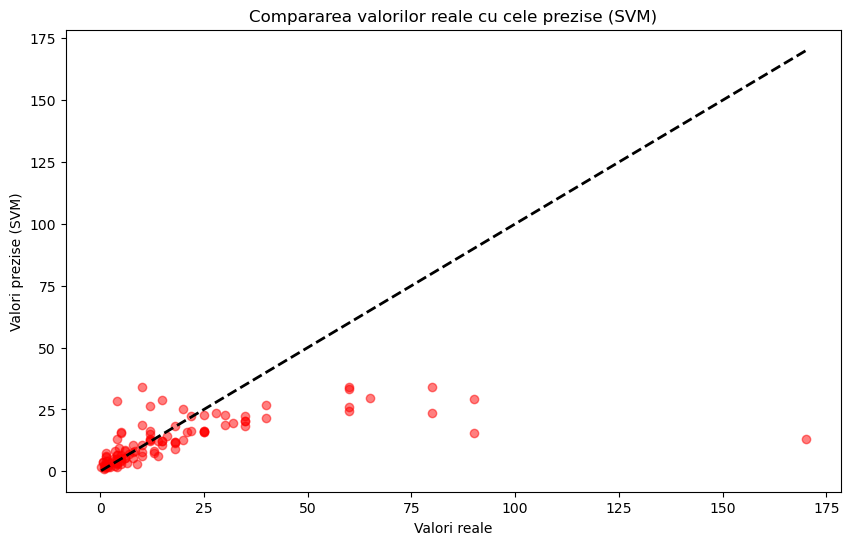

In [67]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardizarea datelor
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inițializarea modelului SVM
svm_model = SVR()

# Antrenarea modelului SVM
svm_model.fit(X_train_scaled, y_train)

# Prezicerea valorilor pentru setul de testare folosind modelul SVM
predictions_svm = svm_model.predict(X_test_scaled)

# Calcularea metricei pentru SVM
mse_svm = mean_squared_error(y_test, predictions_svm)
mae_svm = mean_absolute_error(y_test, predictions_svm)
medae_svm = median_absolute_error(y_test, predictions_svm)
r2_svm = r2_score(y_test, predictions_svm)
efficiency_svm = r2_svm * 100

print("Mean Squared Error (SVM):", mse_svm)
print("Mean Absolute Error (SVM):", mae_svm)
print("Median Absolute Error (SVM):", medae_svm)
print("R-squared (SVM):", r2_svm)
print("Procentajul de eficiență (SVM): {:.2f}%".format(efficiency_svm))

# Crearea unui grafic de dispersie pentru valorile reale și cele prezise pentru modelul SVM
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_svm, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valori reale')
plt.ylabel('Valori prezise (SVM)')
plt.title('Compararea valorilor reale cu cele prezise (SVM)')
plt.show()


In [68]:
from sklearn.tree import DecisionTreeRegressor

# Inițializarea modelului Arbori de Decizie
tree_model = DecisionTreeRegressor(random_state=42)

# Antrenarea modelului Arbori de Decizie
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

Mean Squared Error (Decision Tree): 326.3156712962963
Mean Absolute Error (Decision Tree): 8.551388888888889
Median Absolute Error (Decision Tree): 3.0
R-squared (Decision Tree): 0.45765820031691085
Procentajul de eficiență (Decision Tree): 45.77%


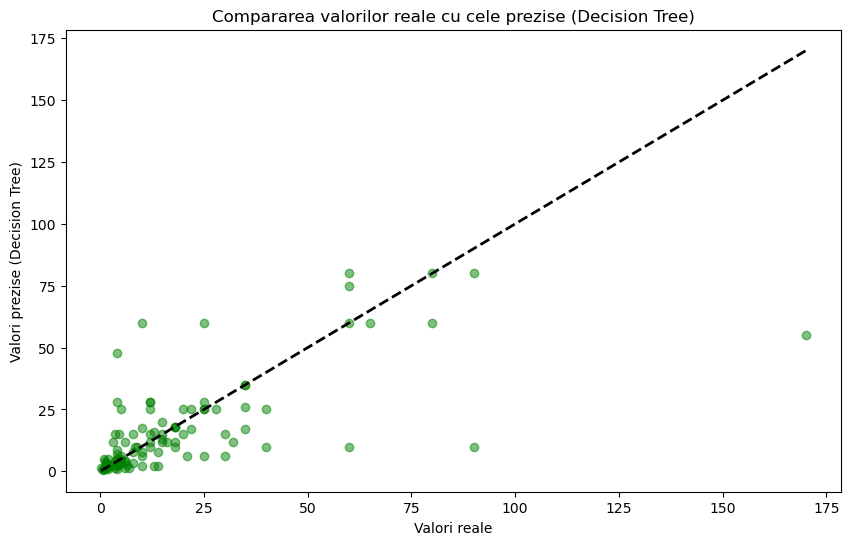

In [69]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Inițializarea modelului de Arbori de Decizie
tree_model = DecisionTreeRegressor()

# Antrenarea modelului Arbori de Decizie
tree_model.fit(X_train, y_train)

# Prezicerea valorilor pentru setul de testare folosind modelul Arbori de Decizie
predictions_tree = tree_model.predict(X_test)

# Calcularea metricei pentru Arbori de Decizie
mse_tree = mean_squared_error(y_test, predictions_tree)
mae_tree = mean_absolute_error(y_test, predictions_tree)
medae_tree = median_absolute_error(y_test, predictions_tree)
r2_tree = r2_score(y_test, predictions_tree)
efficiency_tree = r2_tree * 100

print("Mean Squared Error (Decision Tree):", mse_tree)
print("Mean Absolute Error (Decision Tree):", mae_tree)
print("Median Absolute Error (Decision Tree):", medae_tree)
print("R-squared (Decision Tree):", r2_tree)
print("Procentajul de eficiență (Decision Tree): {:.2f}%".format(efficiency_tree))

# Crearea unui grafic de dispersie pentru valorile reale și cele prezise pentru modelul Arbori de Decizie
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_tree, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valori reale')
plt.ylabel('Valori prezise (Decision Tree)')
plt.title('Compararea valorilor reale cu cele prezise (Decision Tree)')
plt.show()


In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

# Calcularea metricei pentru regresia liniară
mse_linear = mean_squared_error(y_test, predictions_linear)
mae_linear = mean_absolute_error(y_test, predictions_linear)
medae_linear = median_absolute_error(y_test, predictions_linear)
r2_linear = r2_score(y_test, predictions_linear)
efficiency_linear = r2_linear * 100

# Calcularea metricei pentru SVM
mse_svm = mean_squared_error(y_test, predictions_svm)
mae_svm = mean_absolute_error(y_test, predictions_svm)
medae_svm = median_absolute_error(y_test, predictions_svm)
r2_svm = r2_score(y_test, predictions_svm)
efficiency_svm = r2_svm * 100

# Calcularea metricei pentru Arbori de Decizie
mse_tree = mean_squared_error(y_test, predictions_tree)
mae_tree = mean_absolute_error(y_test, predictions_tree)
medae_tree = median_absolute_error(y_test, predictions_tree)
r2_tree = r2_score(y_test, predictions_tree)
efficiency_tree = r2_tree * 100

# Compararea și analiza rezultatelor
print("Eroarea pătratică medie (Regresie Liniară):", mse_linear)
print("Eroarea absolută medie (Regresie Liniară):", mae_linear)
print("Eroarea mediană absolută (Regresie Liniară):", medae_linear)
print("Coeficientul de determinare (Regresie Liniară):", r2_linear)
print("Procentajul de eficiență (Regresie Liniară): {:.2f}%".format(efficiency_linear))
print("\n")
print("Eroarea pătratică medie (SVM):", mse_svm)
print("Eroarea absolută medie (SVM):", mae_svm)
print("Eroarea mediană absolută (SVM):", medae_svm)
print("Coeficientul de determinare (SVM):", r2_svm)
print("Procentajul de eficiență (SVM): {:.2f}%".format(efficiency_svm))
print("\n")
print("Eroarea pătratică medie (Arbori de Decizie):", mse_tree)
print("Eroarea absolută medie (Arbori de Decizie):", mae_tree)
print("Eroarea mediană absolută (Arbori de Decizie):", medae_tree)
print("Coeficientul de determinare (Arbori de Decizie):", r2_tree)
print("Procentajul de eficiență (Arbori de Decizie): {:.2f}%".format(efficiency_tree))

# Analiza rezultatelor și alegerea modelului final
modele_metrice = {
    'Regresie Liniară': {'EPM': mse_linear, 'EAM': mae_linear, 'EMA': medae_linear, 'R^2': r2_linear, 'Eficiență': efficiency_linear},
    'SVM': {'EPM': mse_svm, 'EAM': mae_svm, 'EMA': medae_svm, 'R^2': r2_svm, 'Eficiență': efficiency_svm},
    'Arbori de Decizie': {'EPM': mse_tree, 'EAM': mae_tree, 'EMA': medae_tree, 'R^2': r2_tree, 'Eficiență': efficiency_tree}
}

cel_mai_bun_model_epm = min(modele_metrice, key=lambda x: modele_metrice[x]['EPM'])
print("Cel mai bun model bazat pe Eroarea Pătratică Medie:", cel_mai_bun_model_epm)
cel_mai_bun_model_eam = min(modele_metrice, key=lambda x: modele_metrice[x]['EAM'])
print("Cel mai bun model bazat pe Eroarea Absolută Medie:", cel_mai_bun_model_eam)
cel_mai_bun_model_ema = min(modele_metrice, key=lambda x: modele_metrice[x]['EMA'])
print("Cel mai bun model bazat pe Eroarea Mediană Absolută:", cel_mai_bun_model_ema)
cel_mai_bun_model_r2 = max(modele_metrice, key=lambda x: modele_metrice[x]['R^2'])
print("Cel mai bun model bazat pe Coeficientul de Determinare:", cel_mai_bun_model_r2)



Eroarea pătratică medie (Regresie Liniară): 185.68424817153632
Eroarea absolută medie (Regresie Liniară): 8.320465959277765
Eroarea mediană absolută (Regresie Liniară): 5.568102588254356
Coeficientul de determinare (Regresie Liniară): 0.6913898467514534
Procentajul de eficiență (Regresie Liniară): 69.14%


Eroarea pătratică medie (SVM): 454.26625752804586
Eroarea absolută medie (SVM): 9.440602293058486
Eroarea mediană absolută (SVM): 3.070471702398564
Coeficientul de determinare (SVM): 0.24500230508586562
Procentajul de eficiență (SVM): 24.50%


Eroarea pătratică medie (Arbori de Decizie): 326.3156712962963
Eroarea absolută medie (Arbori de Decizie): 8.551388888888889
Eroarea mediană absolută (Arbori de Decizie): 3.0
Coeficientul de determinare (Arbori de Decizie): 0.45765820031691085
Procentajul de eficiență (Arbori de Decizie): 45.77%
Cel mai bun model bazat pe Eroarea Pătratică Medie: Regresie Liniară
Cel mai bun model bazat pe Eroarea Absolută Medie: Regresie Liniară
Cel mai bun mo

Mean Squared Error (Linear Regression): 185.68424817153632
Mean Absolute Error (Linear Regression): 8.320465959277765
R-squared (Linear Regression): 0.6913898467514534
Procentajul de eficiență (Regresie Liniară): 69.14%
Valori reale și prezise pentru Regresie Liniară:
Real: 25.0, Prezis: 21.360883782581077
Real: 1.5, Prezis: 6.286673232753128
Real: 3.5, Prezis: -1.418969711701882
Real: 9.0, Prezis: 1.5599536437391464
Real: 1.2, Prezis: -9.008215176599101
Real: 4.0, Prezis: 2.597850608748385
Real: 4.0, Prezis: 1.1174517605199306
Real: 1.5, Prezis: 1.3654180893260484
Real: 25.0, Prezis: 17.267689072964973
Real: 15.0, Prezis: 22.744904103019955
Real: 80.0, Prezis: 50.72468011624672
Real: 12.0, Prezis: 15.950995125344374
Real: 8.0, Prezis: 10.929116580424349
Real: 8.0, Prezis: 12.025735376894986
Real: 5.0, Prezis: 12.570166059161412
Real: 25.0, Prezis: 24.59143044530177
Real: 65.0, Prezis: 45.584067323994134
Real: 32.0, Prezis: 19.114803310476603
Real: 21.0, Prezis: 19.093623381393247
Real

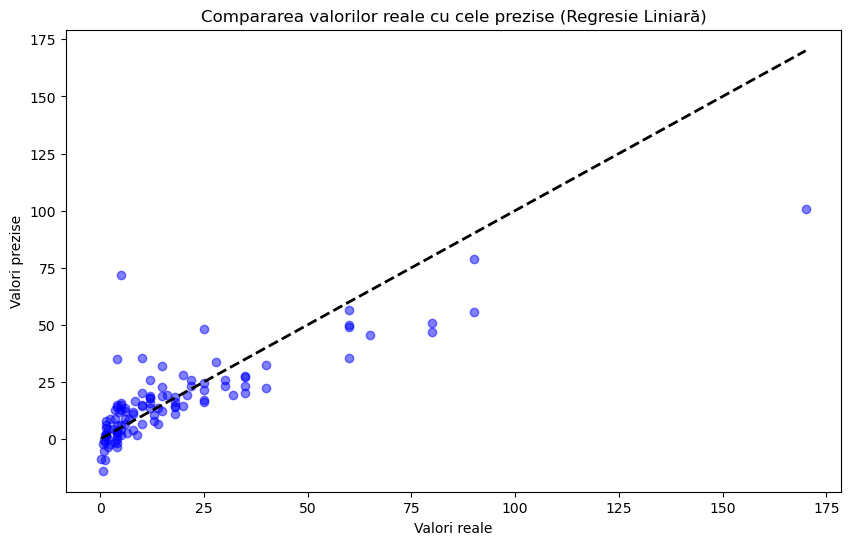

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Împărțirea datelor în seturi de antrenament și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inițializarea și antrenarea modelului de regresie liniară
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
predictions_linear = linear_model.predict(X_test)

# Calcularea metricei pentru regresia liniară
mse_linear = mean_squared_error(y_test, predictions_linear)
mae_linear = mean_absolute_error(y_test, predictions_linear)
r2_linear = r2_score(y_test, predictions_linear)
efficiency_linear = r2_linear * 100

print("Mean Squared Error (Linear Regression):", mse_linear)
print("Mean Absolute Error (Linear Regression):", mae_linear)
print("R-squared (Linear Regression):", r2_linear)
print("Procentajul de eficiență (Regresie Liniară): {:.2f}%".format(efficiency_linear))

# Afișarea valorilor reale și prezise pentru regresia liniară
print("Valori reale și prezise pentru Regresie Liniară:")
for real, pred in zip(y_test, predictions_linear):
    print(f"Real: {real}, Prezis: {pred}")

# Crearea unui grafic de dispersie pentru valorile reale și cele prezise
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_linear, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valori reale')
plt.ylabel('Valori prezise')
plt.title('Compararea valorilor reale cu cele prezise (Regresie Liniară)')
plt.show()
